In [1]:
import os
import json
import matplotlib.pyplot as plt

In [2]:
# Visualize last run
# Get model output directory
model_out_dir = '../model_out'

# Check that it exists
assert os.path.exists(model_out_dir), f"ERROR: {model_out_dir} does not exist."

# Get all files
runs_files = os.listdir(model_out_dir)
# Find latest run files
# Losses
losses = sorted([file for file in runs_files if file.endswith('.csv')])

# Check there are losses files
assert len(losses) > 0, "ERROR: No losses files found"

last_run_losses_file = losses[-1]
last_run_losses_path = os.path.join(model_out_dir, last_run_losses_file)
# Find associated params file
params = sorted([file for file in runs_files if file.endswith('.txt')])

# Check there are params files
assert len(params) > 0, "ERROR: No params files found"

last_run_params_file = params[-1]
last_run_params_path = os.path.join(model_out_dir, last_run_params_file)

# Make sure the files match
assert last_run_losses_file.replace("_losses.csv", "") == \
    last_run_params_file.replace("_hyperparameters.txt", ""), \
    (f"ERROR: A file is missing.\n{last_run_losses_file} !="
     f" {last_run_params_file}")

# Open and read in latest run files
with open(last_run_losses_path, 'r') as f:
    losses_string = f.read()
    # Convert to form ingestible by matplotlib
    losses = [float(loss) for loss in losses_string.split(',')]
with open(last_run_params_path, 'r') as f:
    params_string = f.read()
    # Convert to prettified printable version
    params = json.loads(params_string)

In [3]:
# Output hyperparameters
params

{'batch_size': 8,
 'accumulation_steps': 2,
 'chunk_size': 256,
 'margin': 0.5,
 'epsilon': 1e-06,
 'num_pairs': 64}

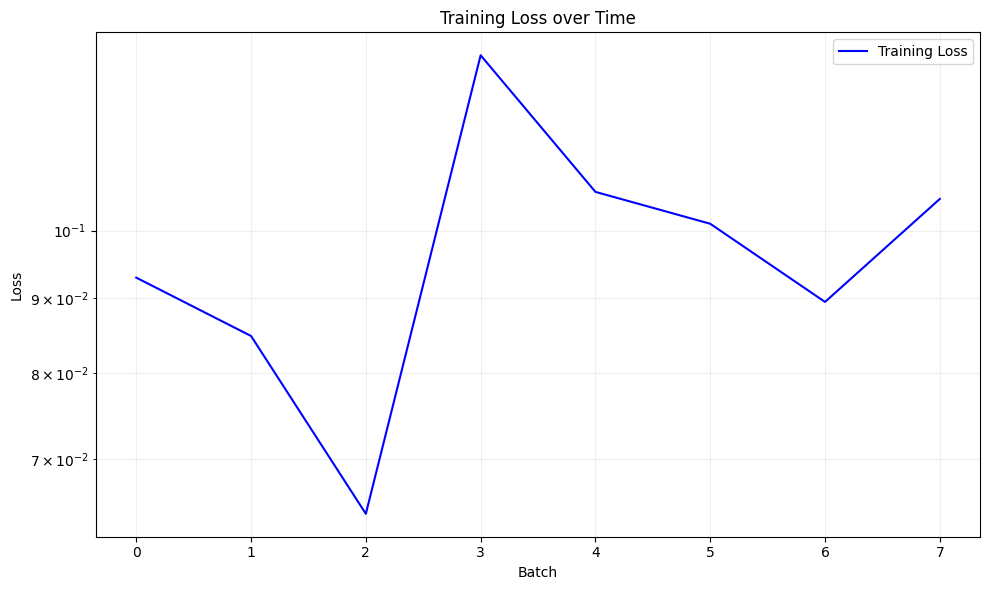

In [4]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(losses, 'b-', label='Training Loss')
plt.grid(True)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.legend()

plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)

# Show the plot
plt.tight_layout()
plt.show()